In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

np.random.seed(2022)
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

sc = MinMaxScaler()
sc.fit(X_train)

sc_train, sc_val = sc.transform(X_train), sc.transform(X_val)

In [3]:
w = np.random.uniform(low=-0.05, high=0.05, size=(X.shape[1])) / X.shape[1]
b = np.random.uniform(low=-0.05, high=0.05, size=(1)) / X.shape[1]
print(w, b)

[-1.63547129e-03 -3.14063049e-06 -1.28872103e-03 -1.50008661e-03
  6.18025314e-04 -4.33731059e-05  1.32552409e-03  4.91506902e-04
  1.32321041e-03  7.37116431e-04  1.10451140e-03  1.09189356e-03
  1.11193195e-03  1.52348112e-03 -4.39851877e-04 -1.72079004e-05
 -5.34968418e-04  3.98097754e-04  1.59176546e-03 -1.34522307e-03
  8.14020708e-04 -6.91668420e-04 -6.71082163e-04  8.41578242e-04
 -1.60445424e-03  7.91247866e-05  1.21478616e-03 -3.70523866e-04
 -9.59360502e-04 -8.27309858e-05] [0.00021557]


## Gradient descent based method :

In [4]:
def forward(x, w, b):
    return np.dot(x, w) + b

def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

def grad_descent(x, w, y_true, y_hat):
    dw = (1/len(y_true)) * np.dot(x.T, (y_hat - y_true))
    db = (1 / len(y_true) *np.sum(y_hat - y_true))
    return dw, db

def loss_func(y_true, y_hat, epsilon=1e-6):
    y_hat = np.clip(y_hat, a_min = epsilon, a_max= 1 - epsilon)
    f1 = y_true * np.log(y_hat)
    f2 = (1 - y_true ) * np.log( 1 - y_hat + epsilon) 
    f = f1 + f2
    return - np.mean(f)

def accuracy(y_true, y_hat):
    return np.sum(y_true == y_hat) / len(y_true)

def update(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

def argmaxThis(pred):
    argmaxed = []
    for i in range(len(pred)):
        if pred[i] > 0.5:
            argmaxed.append(1)
        else : 
            argmaxed.append(0)
    return argmaxed

In [5]:
loss_hist, val_loss_hist = [], []

for _ in range(1300):
    y_hat = sigmoid(forward(sc_train, w, b))
    dw, db = grad_descent(sc_train, w, y_train, y_hat)
    w, b = update(w, b, dw, db, 0.01)
    loss = loss_func(y_train, y_hat)
    val_hat = sigmoid(forward(sc_val, w, b))
    val_loss = loss_func(y_val, val_hat)
    loss_hist.append(loss)
    val_loss_hist.append(val_loss)

In [6]:
train_pred = sigmoid(np.dot(sc_train, w) + b)
train_acc = accuracy(y_train, argmaxThis(train_pred))

val_pred =  sigmoid(np.dot(sc_val, w) + b)
val_acc = accuracy(y_val, argmaxThis(val_pred))

Train Accuracy :  0.91796875
Validation Accuracy :  0.9473684210526315


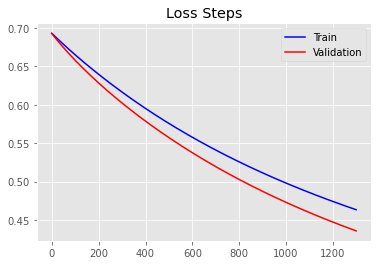

In [7]:
print("Train Accuracy : ", train_acc)
print("Validation Accuracy : ", val_acc)

plt.title("Loss Steps")
plt.plot(loss_hist, color="b", label="Train")
plt.plot(val_loss_hist, color="r", label="Validation")
plt.legend();